### Набор данных с ценами на мобильные устройства

Вывод всех столбцов

In [1]:
import pandas as pd 
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")
print(df.columns)

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')


Бизнес-цели:
1. Классифицировать мобильные устройства по ценовым категориям (например, бюджетные, средний класс, флагманы).
2. Определить, какие характеристики мобильных устройств наиболее сильно влияют на их рейтинг.

Выполним разбиение на 3 выборки: обучающую, контрольную и тестовую

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 671
Размер контрольной выборки: 288
Размер тестовой выборки: 411


Распределение классов в company:
company
Vivo        186
Realme      186
Samsung     181
Motorola    127
Xiaomi       90
Honor        88
Poco         75
OnePlus      75
Huawei       62
iQOO         57
OPPO         38
Oppo         27
TCL          26
Google       23
Asus         21
POCO         19
Lava         19
Nothing      15
Lenovo       14
Tecno        13
itel         12
LG            6
Gionee        5
Itel          3
IQOO          1
Coolpad       1
Name: count, dtype: int64


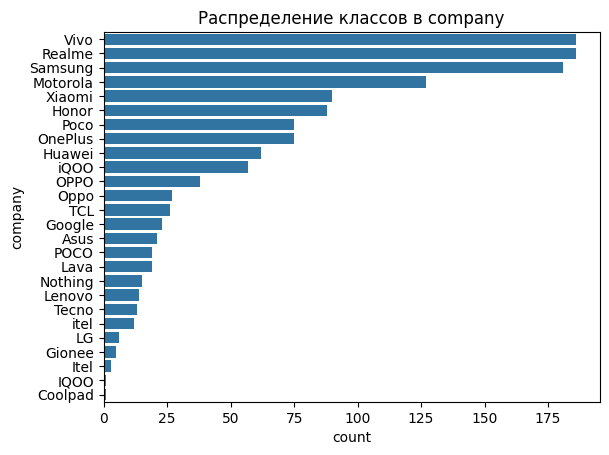

Распределение классов в Обучающей выборке:
company
Vivo        138
Samsung     128
Realme      125
Motorola     89
Xiaomi       66
Honor        59
OnePlus      56
Poco         52
Huawei       46
iQOO         37
Oppo         21
OPPO         20
Google       16
Lava         16
POCO         14
TCL          14
Asus         12
Lenovo       12
itel         10
Nothing       8
Tecno         8
LG            5
Gionee        4
IQOO          1
Itel          1
Coolpad       1
Name: count, dtype: int64


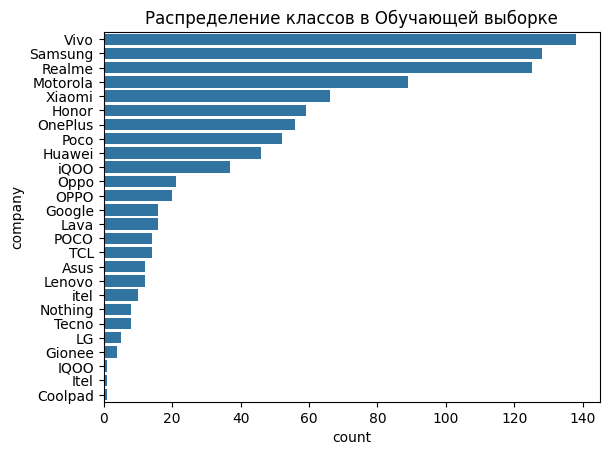

Распределение классов в Контрольной выборке:
company
Realme      26
Samsung     26
Vivo        22
Motorola    18
Honor       15
OPPO        13
Poco        12
Xiaomi      11
iQOO        11
OnePlus      8
Huawei       7
Asus         7
TCL          6
POCO         5
Oppo         4
Google       4
Tecno        3
Nothing      3
itel         2
Lava         1
Lenovo       1
Name: count, dtype: int64


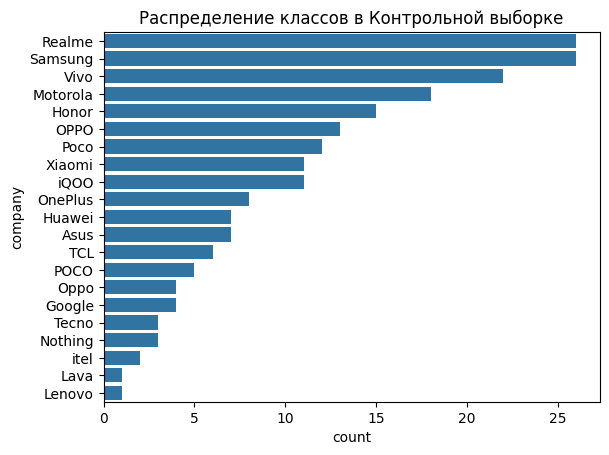

Распределение классов в Тестовой выборке:
company
Realme      35
Samsung     27
Vivo        26
Motorola    20
Honor       14
Xiaomi      13
Poco        11
OnePlus     11
Huawei       9
iQOO         9
TCL          6
OPPO         5
Nothing      4
Google       3
Lava         2
Asus         2
Oppo         2
Tecno        2
Itel         2
Gionee       1
Lenovo       1
LG           1
Name: count, dtype: int64


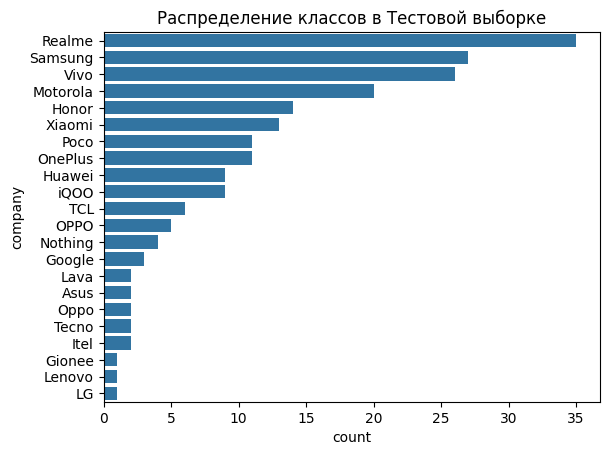

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Проверка распределения классов в столбце company
class_distribution = df['company'].value_counts()
print("Распределение классов в company:")
print(class_distribution)

# Визуализация распределения классов
sns.countplot(y='company', data=df, order=class_distribution.index)
plt.title('Распределение классов в company')
plt.show()

# Проверка сбалансированности для каждой выборки
def check_balance(df, title):
    class_distribution = df['company'].value_counts()
    print(f"Распределение классов в {title}:")
    print(class_distribution)
    sns.countplot(y='company', data=df, order=class_distribution.index)
    plt.title(f'Распределение классов в {title}')
    plt.show()

# Разделение данных на обучающую, контрольную и тестовую выборки
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка сбалансированности для обучающей, контрольной и тестовой выборок
check_balance(train_df, 'Обучающей выборке')
check_balance(val_df, 'Контрольной выборке')
check_balance(test_df, 'Тестовой выборке')

 Данные по столбцу company являются несбалансированными. Некоторые компании, такие как Vivo, Realme, и Samsung, имеют значительно больше устройств, чем другие, такие как LG, Gionee, и Itel.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки до upsampling:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Функция для проверки балансировки данных
def check_balance(df, title):
    class_distribution = df['company'].value_counts()
    print(f"\nРаспределение классов в {title}:")
    for cls, count in class_distribution.items():
        print(f"Класс {cls}: {count} ({count / len(df) * 100:.2f}%)")

# Проверка балансировки для всего датасета
check_balance(df, 'всем датасете')

# Проверка балансировки для обучающей выборки до upsampling
check_balance(train_df, 'Обучающей выборке до upsampling')

# Применение upsampling к обучающей выборке
X_train = train_df.drop('company', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['company']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Вывод размеров выборок после upsampling
print("Размер обучающей выборки после upsampling:", len(train_df_resampled))

# Проверка балансировки для обучающей выборки после upsampling
check_balance(train_df_resampled, 'Обучающей выборке после upsampling')

# Проверка балансировки для контрольной и тестовой выборок (они не должны измениться)
check_balance(val_df, 'Контрольной выборке')
check_balance(test_df, 'Тестовой выборке')

Размер обучающей выборки до upsampling: 671
Размер контрольной выборки: 288
Размер тестовой выборки: 411

Распределение классов в всем датасете:
Класс Vivo: 186 (13.58%)
Класс Realme: 186 (13.58%)
Класс Samsung: 181 (13.21%)
Класс Motorola: 127 (9.27%)
Класс Xiaomi: 90 (6.57%)
Класс Honor: 88 (6.42%)
Класс Poco: 75 (5.47%)
Класс OnePlus: 75 (5.47%)
Класс Huawei: 62 (4.53%)
Класс iQOO: 57 (4.16%)
Класс OPPO: 38 (2.77%)
Класс Oppo: 27 (1.97%)
Класс TCL: 26 (1.90%)
Класс Google: 23 (1.68%)
Класс Asus: 21 (1.53%)
Класс POCO: 19 (1.39%)
Класс Lava: 19 (1.39%)
Класс Nothing: 15 (1.09%)
Класс Lenovo: 14 (1.02%)
Класс Tecno: 13 (0.95%)
Класс itel: 12 (0.88%)
Класс LG: 6 (0.44%)
Класс Gionee: 5 (0.36%)
Класс Itel: 3 (0.22%)
Класс IQOO: 1 (0.07%)
Класс Coolpad: 1 (0.07%)

Распределение классов в Обучающей выборке до upsampling:
Класс Vivo: 94 (14.01%)
Класс Samsung: 89 (13.26%)
Класс Realme: 82 (12.22%)
Класс Motorola: 66 (9.84%)
Класс Xiaomi: 46 (6.86%)
Класс Honor: 40 (5.96%)
Класс OnePlus: 40

Данные были сбалансированы. Теперь можно перейти к конструированию признаков. Поставлены следующие задачи:
1. Классифицировать мобильные устройства по ценовым категориям (например, бюджетные, средний класс, флагманы).
2. Определить, какие характеристики мобильных устройств наиболее сильно влияют на их рейтинг.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Определение категориальных признаков
categorical_features = [
    'Rating', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor'
]

# Применение one-hot encoding к обучающей выборке
train_df_resampled_encoded = pd.get_dummies(train_df_resampled, columns=categorical_features)

# Применение one-hot encoding к контрольной выборке
val_df_encoded = pd.get_dummies(val_df, columns=categorical_features)

# Применение one-hot encoding к тестовой выборке
test_df_encoded = pd.get_dummies(test_df, columns=categorical_features)

Дискретизация числовых признаков

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import re

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Извлечение числовых значений из столбца Battery
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
df['Ram'] = df['Ram'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
df['Camera'] = df['Camera'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Применение upsampling к обучающей выборке (если это необходимо)
X_train = train_df.drop('Price', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['Price']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Определение числовых признаков для дискретизации
numerical_features = ['Spec_score', 'Battery', 'Ram', 'Camera' ]

# Функция для дискретизации числовых признаков
def discretize_features(df, features, bins=5, labels=False):
    for feature in features:
        try:
            # Заполнение NaN значений, если они есть
            df[feature] = df[feature].fillna(df[feature].median())
            df[f'{feature}_bin'] = pd.cut(df[feature], bins=bins, labels=labels)
        except Exception as e:
            print(f"Ошибка при дискретизации признака {feature}: {e}")
    return df

# Применение дискретизации к обучающей, контрольной и тестовой выборкам
train_df_resampled = discretize_features(train_df_resampled, numerical_features)
val_df = discretize_features(val_df, numerical_features)
test_df = discretize_features(test_df, numerical_features)

# Вывод размеров выборок
print("Размер обучающей выборки после балансировки:", train_df_resampled.shape)
print("Размер контрольной выборки:", val_df.shape)
print("Размер тестовой выборки:", test_df.shape)

Размер обучающей выборки после балансировки: (5600, 22)
Размер контрольной выборки: (288, 22)
Размер тестовой выборки: (411, 22)


Ручной синтез. Создание новых признаков на основе экспертных знаний и логики предметной области.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Преобразование столбца Battery в числовой формат
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Преобразование столбцов Camera и Display в числовой формат
df['Camera'] = pd.to_numeric(df['Camera'], errors='coerce')
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Применение upsampling к обучающей выборке (если это необходимо)
X_train = train_df.drop('Price', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['Price']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Создание нового признака "Camera_to_Display_Ratio" на основе признаков "Camera" и "Display"
train_df_resampled['Camera_to_Display_Ratio'] = train_df_resampled['Camera'] / train_df_resampled['Display']
val_df['Camera_to_Display_Ratio'] = val_df['Camera'] / val_df['Display']
test_df['Camera_to_Display_Ratio'] = test_df['Camera'] / test_df['Display']

# Вывод размеров выборок
print("Размер обучающей выборки после балансировки:", train_df_resampled.shape)
print("Размер контрольной выборки:", val_df.shape)
print("Размер тестовой выборки:", test_df.shape)

Размер обучающей выборки после балансировки: (5600, 19)
Размер контрольной выборки: (288, 19)
Размер тестовой выборки: (411, 19)


Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import re

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Преобразование столбца Battery в числовой формат
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Преобразование столбцов Camera и Display в числовой формат
df['Camera'] = pd.to_numeric(df['Camera'], errors='coerce')
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Применение upsampling к обучающей выборке (если это необходимо)
X_train = train_df.drop('Price', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['Price']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Создание нового признака "Camera_to_Display_Ratio" на основе признаков "Camera" и "Display"
train_df_resampled['Camera_to_Display_Ratio'] = train_df_resampled['Camera'] / train_df_resampled['Display']
val_df['Camera_to_Display_Ratio'] = val_df['Camera'] / val_df['Display']
test_df['Camera_to_Display_Ratio'] = test_df['Camera'] / test_df['Display']

# Определение числовых признаков для масштабирования
numerical_features_to_scale = ['Spec_score', 'No_of_sim', 'Ram', 'Battery', 'Display', 'Camera', 'Inbuilt_memory', 'Screen_resolution', 'Camera_to_Display_Ratio']

# Удаление строковых значений из числовых признаков
for feature in numerical_features_to_scale:
    train_df_resampled[feature] = pd.to_numeric(train_df_resampled[feature], errors='coerce')
    val_df[feature] = pd.to_numeric(val_df[feature], errors='coerce')
    test_df[feature] = pd.to_numeric(test_df[feature], errors='coerce')

# Инициализация StandardScaler
scaler = StandardScaler()

# Масштабирование числовых признаков в обучающей выборке
train_df_resampled[numerical_features_to_scale] = scaler.fit_transform(train_df_resampled[numerical_features_to_scale])

# Масштабирование числовых признаков в контрольной и тестовой выборках
val_df[numerical_features_to_scale] = scaler.transform(val_df[numerical_features_to_scale])
test_df[numerical_features_to_scale] = scaler.transform(test_df[numerical_features_to_scale])

# Вывод размеров выборок
print("Размер обучающей выборки после балансировки:", train_df_resampled.shape)
print("Размер контрольной выборки:", val_df.shape)
print("Размер тестовой выборки:", test_df.shape)

Размер обучающей выборки после балансировки: (5600, 19)
Размер контрольной выборки: (288, 19)
Размер тестовой выборки: (411, 19)


d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Конструирование признаков с применением фреймворка Featuretools

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import featuretools as ft
import re

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Преобразование столбца Battery в числовой формат
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Преобразование столбцов Camera и Display в числовой формат
df['Camera'] = pd.to_numeric(df['Camera'], errors='coerce')
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Создание нового признака "Camera_to_Display_Ratio" на основе признаков "Camera" и "Display"
train_df['Camera_to_Display_Ratio'] = train_df['Camera'] / train_df['Display']
val_df['Camera_to_Display_Ratio'] = val_df['Camera'] / val_df['Display']
test_df['Camera_to_Display_Ratio'] = test_df['Camera'] / test_df['Display']

# Определение сущностей
es = ft.EntitySet(id='mobile_data')
es = es.add_dataframe(dataframe_name='train', dataframe=train_df, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='train', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df.index)

# Вывод первых нескольких строк для проверки
print("Обучающая выборка после конструирования признаков:")
print(feature_matrix.head())
print("Контрольная выборка после конструирования признаков:")
print(val_feature_matrix.head())
print("Тестовая выборка после конструирования признаков:")
print(test_feature_matrix.head())

Обучающая выборка после конструирования признаков:
    Unnamed: 0  Rating  Spec_score                      No_of_sim        Ram  \
id                                                                             
0          305    4.70          86  Dual Sim, 3G, 4G, 5G, VoLTE,   12 GB RAM   
1          941    4.45          71      Dual Sim, 3G, 4G, VoLTE,    4 GB RAM   
2          800    4.20          68      Dual Sim, 3G, 4G, VoLTE,    4 GB RAM   
3           97    4.25          69      Dual Sim, 3G, 4G, VoLTE,    4 GB RAM   
4         1339    4.30          74      Dual Sim, 3G, 4G, VoLTE,    6 GB RAM   

    Battery                     External_Memory Android_version   company  \
id                                                                          
0      5000                         Android v12             NaN    Realme   
1      5000    Memory Card Supported, upto 1 TB              12  Motorola   
2      5000               Memory Card Supported              12      Vivo   
3  

d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To e

Оценка качества каждого набора признаков

Предсказательная способность Метрики: RMSE, MAE, R²

Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

Скорость вычисления Методы: Измерение времени выполнения генерации признаков и обучения модели.

Надежность Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

Корреляция Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

Цельность Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import featuretools as ft
from sklearn.ensemble import RandomForestRegressor
import re

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Преобразование столбца Battery в числовой формат
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Преобразование столбца Display в числовой формат
df['Camera'] = pd.to_numeric(df['Camera'], errors='coerce')
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
df['Inbuilt_memory'] = pd.to_numeric(df['Inbuilt_memory'], errors='coerce')
df['fast_charging'] = pd.to_numeric(df['fast_charging'], errors='coerce')

# Удаление запятых из столбца Price и преобразование в числовой формат
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Удаление столбцов с текстовыми значениями, которые не могут быть преобразованы в числа
df = df.drop(columns=['Name', 'company', 'Android_version', 'Processor_name', 'External_Memory', 'No_of_sim', 'Ram', 'Screen_resolution', 'Processor'  ])

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Применение upsampling к обучающей выборке (если это необходимо)
X_train = train_df.drop('Price', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['Price']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Определение сущностей
es = ft.EntitySet(id='mobile_data')
es = es.add_dataframe(dataframe_name='mobile', dataframe=train_df_resampled, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='mobile', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df.index)

# Оценка важности признаков
X = feature_matrix
y = train_df_resampled['Price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_
feature_names = feature_matrix.columns

# Сортировка признаков по важности
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Размер обучающей выборки: 671
Размер контрольной выборки: 288
Размер тестовой выборки: 411


d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Feature Importance:
      feature  importance
4       Price    0.999443
2  Spec_score    0.000227
3     Battery    0.000146
0  Unnamed: 0    0.000146
1      Rating    0.000039


Размер обучающей выборки: 66
Размер контрольной выборки: 29
Размер тестовой выборки: 42
Mean Squared Error: 13048795.366100002
R2 Score: -0.23881710583662308


d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

Cross-validated Mean Squared Error: 394482934.1724652


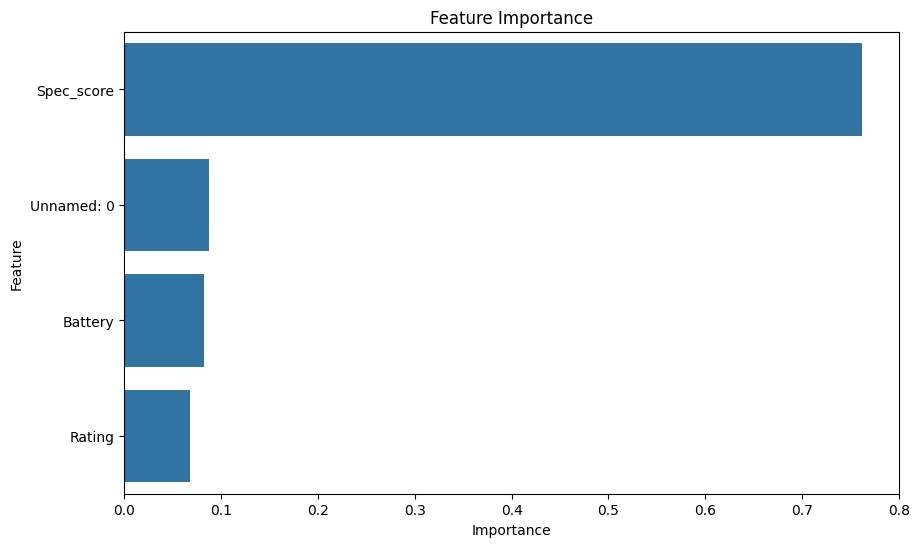

Train Mean Squared Error: 46662951.69621668
Train R2 Score: 0.9411587287387594


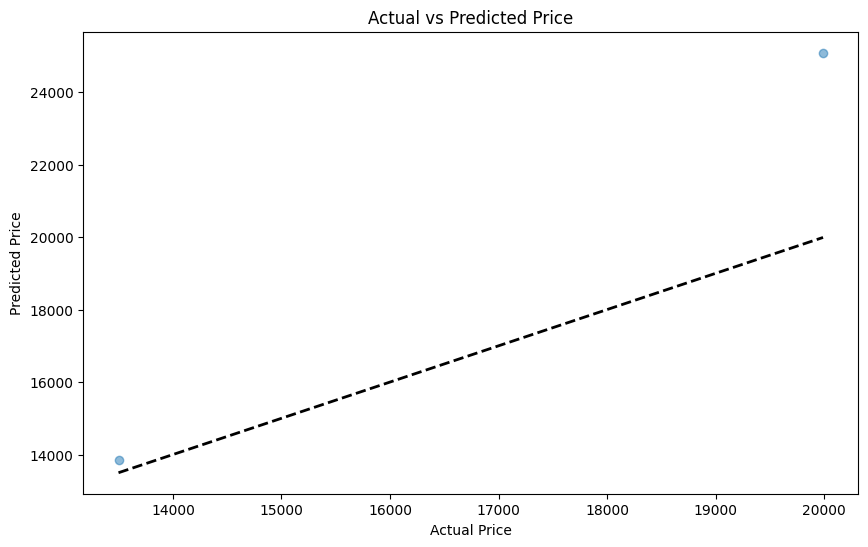

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import re

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Уменьшение размера выборки для ускорения работы (опционально)
df = df.sample(frac=0.1, random_state=42)

# Преобразование столбца Battery в числовой формат
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Преобразование столбца Display в числовой формат
df['Camera'] = pd.to_numeric(df['Camera'], errors='coerce')
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
df['Inbuilt_memory'] = pd.to_numeric(df['Inbuilt_memory'], errors='coerce')
df['fast_charging'] = pd.to_numeric(df['fast_charging'], errors='coerce')

# Удаление запятых из столбца Price и преобразование в числовой формат
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Удаление столбцов с текстовыми значениями, которые не могут быть преобразованы в числа
df = df.drop(columns=['Name', 'company', 'Android_version', 'Processor_name', 'External_Memory', 'No_of_sim', 'Ram', 'Screen_resolution', 'Processor'  ])
# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Определение сущностей
es = ft.EntitySet(id='mobile_data')
es = es.add_dataframe(dataframe_name='mobile', dataframe=train_df, index='id')

# Генерация признаков с уменьшенной глубиной
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='mobile', max_depth=1)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df.index)

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('Price', axis=1)
y_train = feature_matrix['Price']
X_val = val_feature_matrix.drop('Price', axis=1)
y_val = val_feature_matrix['Price']
X_test = test_feature_matrix.drop('Price', axis=1)
y_test = test_feature_matrix['Price']

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -scores.mean()
print(f"Cross-validated Mean Squared Error: {mse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Проверка на переобучение
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R2 Score: {r2_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()